# Avacado Project
#Problem Statement:
#Avocado is a fruit consumed by people heavily in the United States. 



# Content
* This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

* The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

* Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

* The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

# Inspiration /Label 

* The dataset can be seen in two angles to find the region and find the average price .

* Task: One of Classification and other of Regression

* Do both tasks in the same .ipynb file and submit at single file. 

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import zscore

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score,mean_tweedie_deviance
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('avocado.csv')
df.head()    #First five rows of data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Exploratory Data Analysis

In [3]:
df1=df.iloc[:,1:]     #Removing unnecessary index column
df1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df1.dtypes    # To get Data types

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [5]:
df1.describe(include='all')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,27-12-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Albany
freq,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


# *  The above table shows detailed description of data 

In [6]:
df1['Date']=pd.to_datetime(df1['Date'])
df['Month']=df1['Date'].apply(lambda x:x.month)
df1['Day']=df1['Date'].apply(lambda x:x.day)
df1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-04-02,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14


*  Converting Date in the form of Object int DateFrame

In [7]:
df.shape       #To get no. of rows and columns

(18249, 15)

In [8]:
df1.columns    # To get columns names from the data

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Day'],
      dtype='object')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Day           18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


*  The above information shows null values,data types and no.of rows

# Finding null values

In [10]:
df1.isnull().all()

Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
Day             False
dtype: bool

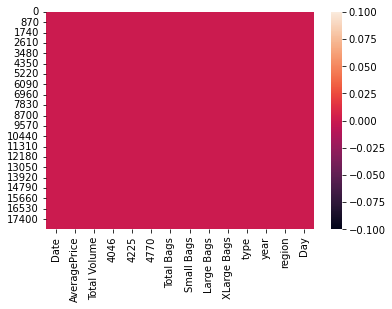

In [11]:
sns.heatmap(df1.isnull())
plt.show()

*  Hence there is no null values in the data

# Data Visualization

54
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                33

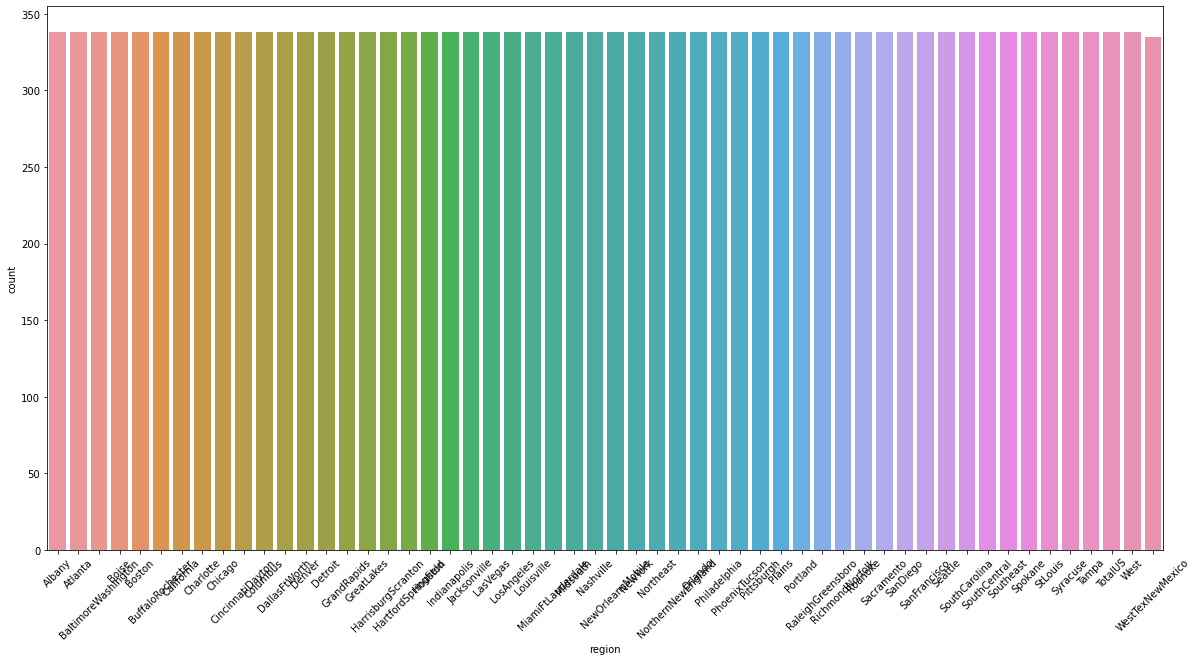

In [12]:
print(df1['region'].nunique())
print(df1['region'].value_counts())
plt.figure(figsize=(20,10))
sns.countplot(df1.region)
plt.xticks(rotation=45)
plt.show()

['conventional' 'organic']
conventional    9126
organic         9123
Name: type, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

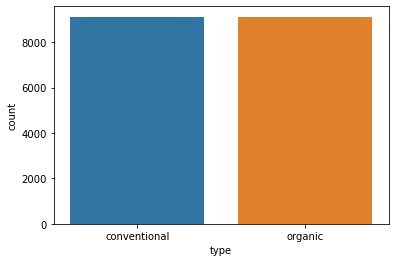

In [13]:
print(df['type'].unique())
print(df1['type'].value_counts())
sns.countplot(df1.type)
plt.show

[2015 2016 2017 2018]


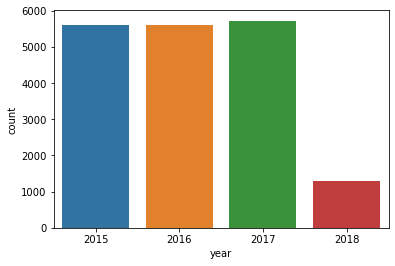

In [14]:
print(df1.year.unique())
sns.countplot(df1.year)
plt.show()

<AxesSubplot:>

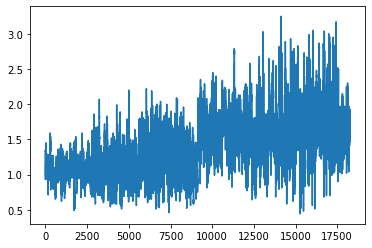

In [15]:
df1['AveragePrice'].plot()

In [16]:
#checking organic
df1.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [17]:
df1.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

# Data Encoding using LabelEncoder

In [18]:
le=LabelEncoder()
varib=['Date','type','region']
for i in varib:
    df1[i]=le.fit_transform(df1[i])
df1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,27
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,20
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,13
3,22,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,46,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,164,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2
18245,159,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,28
18246,158,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,21
18247,157,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,14


array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'Day'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

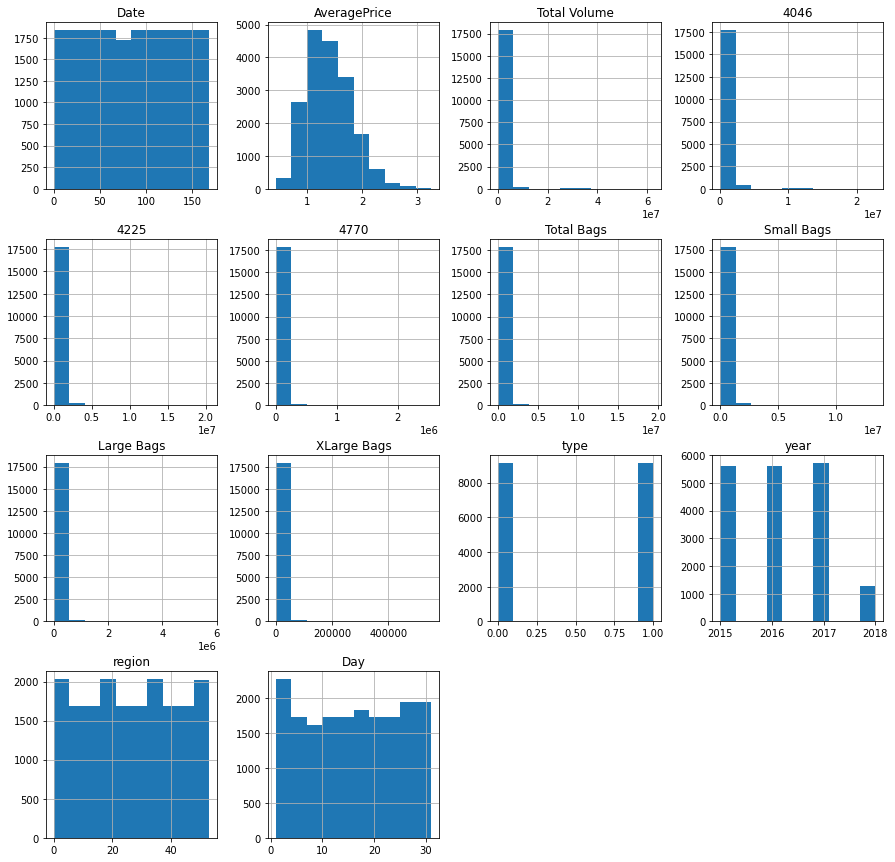

In [19]:
df1.hist(figsize=(15,15))

# Multicollinearity pairplot

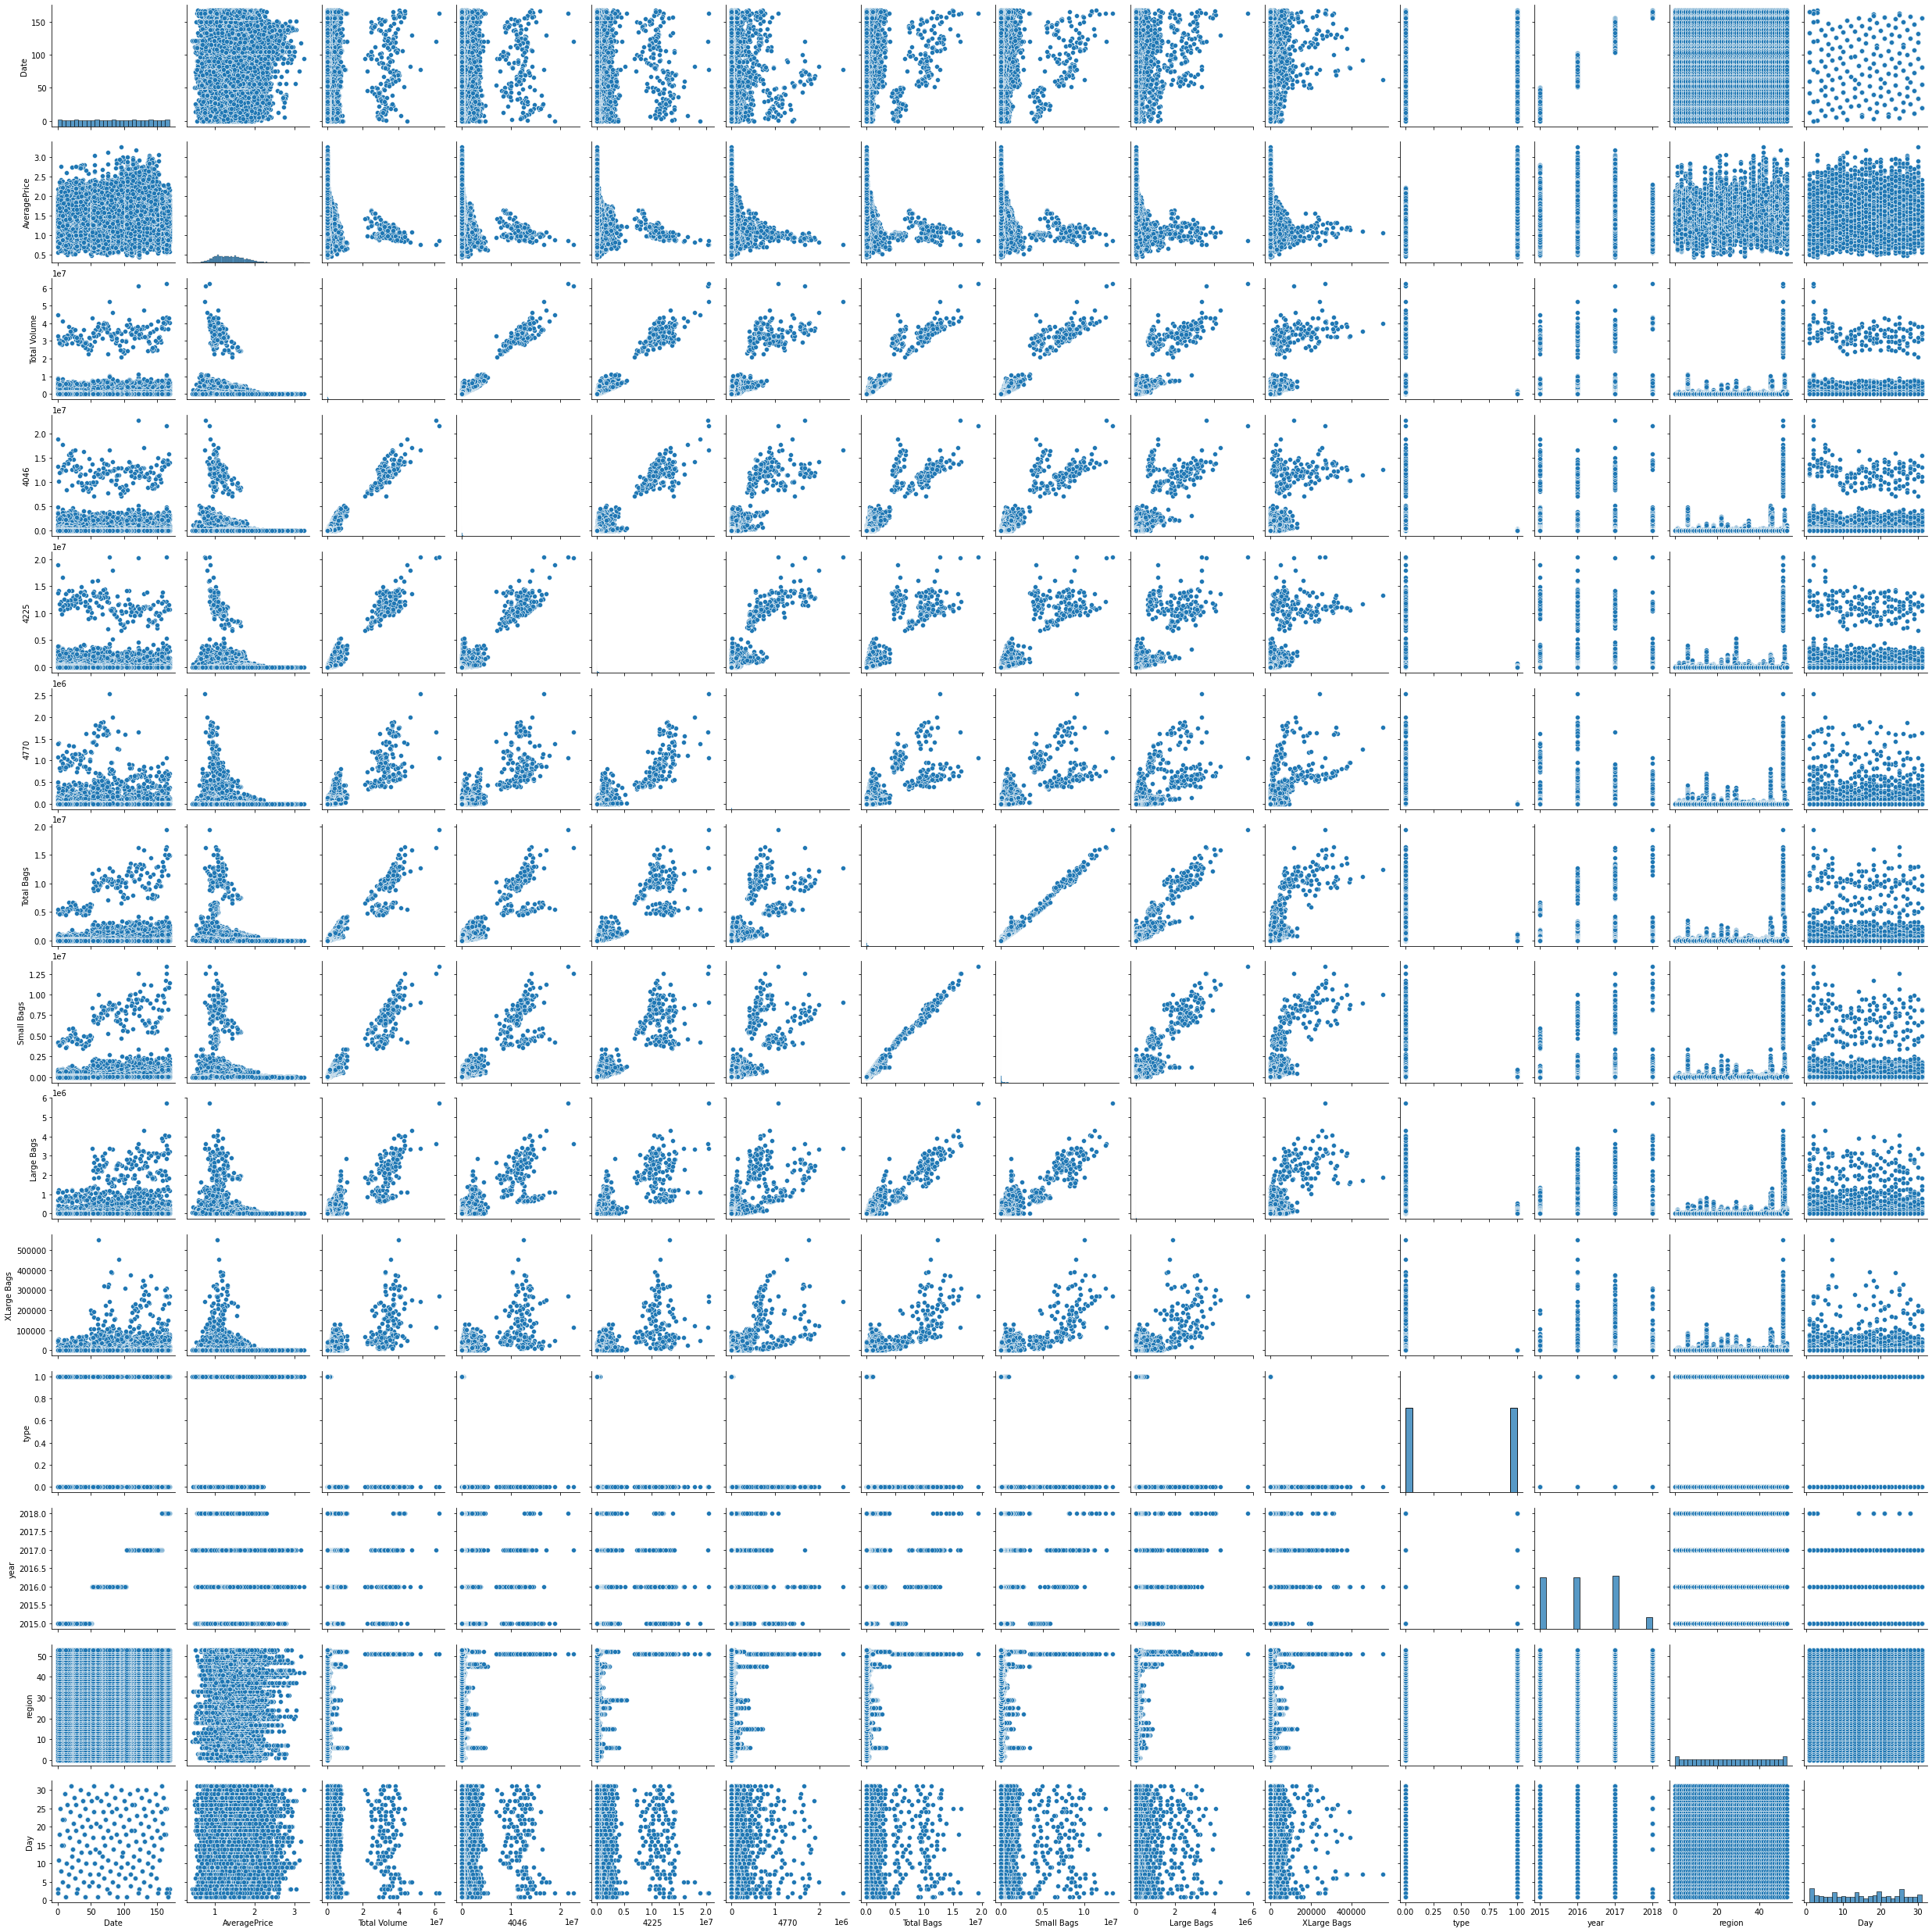

In [20]:
sns.pairplot(df1)

# Correlation matrix

In [21]:
df1.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day
Date,1.000000,0.121166,0.011384,-0.002300,-0.015042,-0.043930,0.065962,0.058596,0.081787,0.077888,-0.000030,0.950267,-0.000052,-0.001188
AveragePrice,0.121166,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.061157
Total Volume,0.011384,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.013212
4046,-0.002300,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.014375
4225,-0.015042,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.014567
4770,-0.043930,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.012446
Total Bags,0.065962,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.008687
Small Bags,0.058596,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.007999
Large Bags,0.081787,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.010477
XLarge Bags,0.077888,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.002364


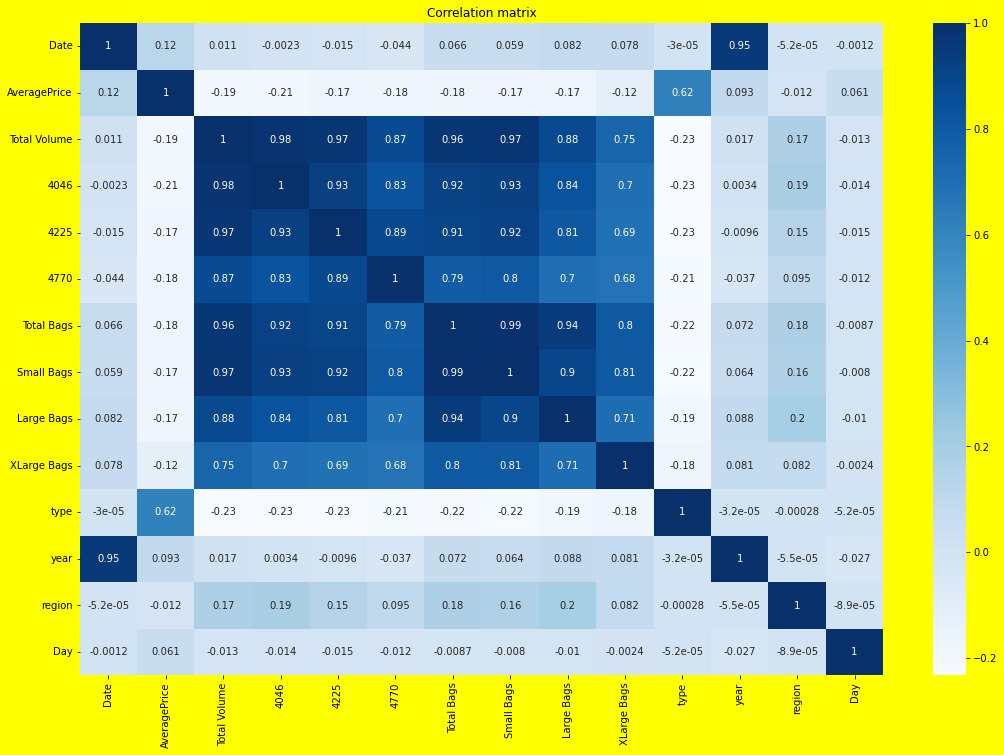

In [22]:
plt.figure(figsize=(18,12),facecolor='yellow')
sns.heatmap(df1.corr(),cmap='Blues',annot=True)
plt.title("Correlation matrix")
plt.show()

*  The above plot shows positive and negetive correlation between feature and labels

# Distribution plot

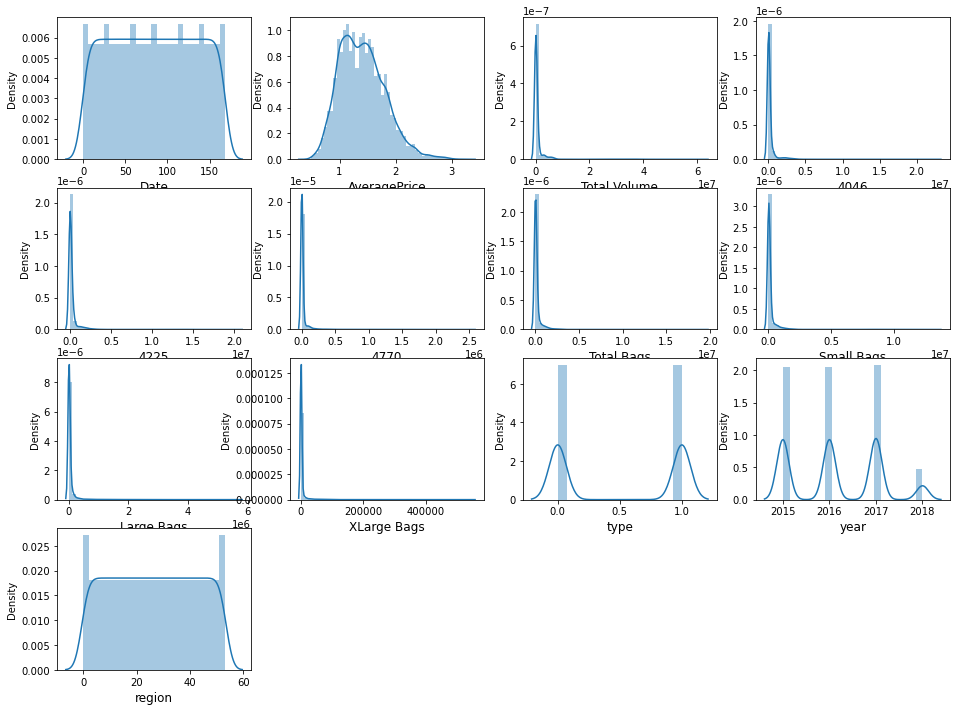

In [23]:
plt.figure(figsize=(16,12))
plotnumber=1

for col in df1:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df1[col])
        plt.xlabel(col,fontsize=12)
        
        plotnumber+=1
        plt.tight_layout

# Finding skewness

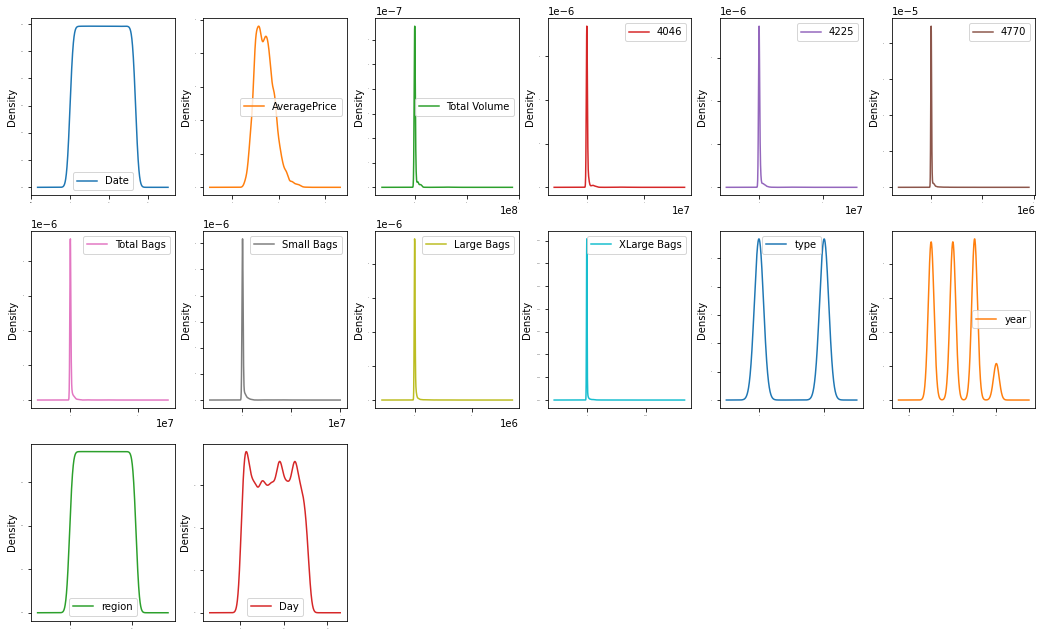

In [24]:
df1.plot(kind='density',subplots=True,layout=(4,6),sharex=False,legend=True,fontsize=1,figsize=(18,15))
plt.show()

# Splitting features and labels

In [25]:
x=df1.drop(['AveragePrice'],axis=1)
y=df1['AveragePrice']

In [26]:
x.skew().sort_values()

Day             -0.001609
region           0.000030
Date             0.000120
type             0.000329
year             0.215339
4046             8.648220
4225             8.942466
Total Volume     9.007687
Small Bags       9.540660
Total Bags       9.756072
Large Bags       9.796455
4770            10.159396
XLarge Bags     13.139751
dtype: float64

*  The above values shows there is lot of right sided skewed data

# Removing Skewness

In [27]:
x_skew=np.cbrt(x[x.columns])
x_skew.skew()

Date           -0.971950
Total Volume    2.236143
4046            2.277861
4225            2.130378
4770            2.316048
Total Bags      2.302176
Small Bags      2.217682
Large Bags      2.186514
XLarge Bags     2.842255
type            0.000329
year            0.214909
region         -1.172781
Day            -0.686769
dtype: float64

# Pre-processing Data

In [28]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x_skew)
x_new


array([[-0.58430127, -0.08868514, -0.66707396, ..., -1.21941815,
        -2.19577142,  1.21843819],
       [-0.60623844, -0.15815421, -0.78213486, ..., -1.21941815,
        -2.19577142,  0.54747952],
       [-0.62829113,  0.17860831, -0.73855207, ..., -1.21941815,
        -2.19577142, -0.18046623],
       ...,
       [ 1.40077303, -0.7753251 , -0.62910639, ...,  1.97154472,
         1.54465713,  0.64617637],
       [ 1.38421193, -0.70194415, -0.56077571, ...,  1.97154472,
         1.54465713, -0.07165555],
       [ 1.53239969, -0.66767237, -0.38025601, ...,  1.97154472,
         1.54465713, -1.84364695]])

In [29]:
X=pd.DataFrame(x_new,columns=x.columns)
X

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day
0,-0.584301,-0.088685,-0.667074,0.306945,-0.178290,-0.528822,-0.348336,-0.725134,-0.708808,-0.999836,-1.219418,-2.195771,1.218438
1,-0.606238,-0.158154,-0.782135,0.230613,-0.141875,-0.490578,-0.314277,-0.716582,-0.708808,-0.999836,-1.219418,-2.195771,0.547480
2,-0.628291,0.178608,-0.738552,0.581288,0.016451,-0.556920,-0.373885,-0.705678,-0.708808,-0.999836,-1.219418,-2.195771,-0.180466
3,-1.285455,0.002248,-0.643184,0.415636,-0.099721,-0.700609,-0.503509,-0.654352,-0.708808,-0.999836,-1.219418,-2.195771,-0.291338
4,-0.695176,-0.190194,-0.693122,0.223711,-0.091325,-0.674293,-0.484028,-0.574084,-0.708808,-0.999836,-1.219418,-2.195771,1.402811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.499634,-0.678453,-0.478926,-0.926164,-1.276496,-0.338490,-0.186980,-0.402052,-0.708808,1.000164,1.971545,1.544657,-1.634958
18245,1.417310,-0.771375,-0.629157,-0.672791,-1.276496,-0.501624,-0.333751,-0.466559,-0.708808,1.000164,1.971545,1.544657,1.310975
18246,1.400773,-0.775325,-0.629106,-0.779870,0.378277,-0.495659,-0.316571,-0.869126,-0.708808,1.000164,1.971545,1.544657,0.646176
18247,1.384212,-0.701944,-0.560776,-0.717983,0.377998,-0.428697,-0.256960,-0.839950,-0.708808,1.000164,1.971545,1.544657,-0.071656


# Distribution plot after removing skewness in the data

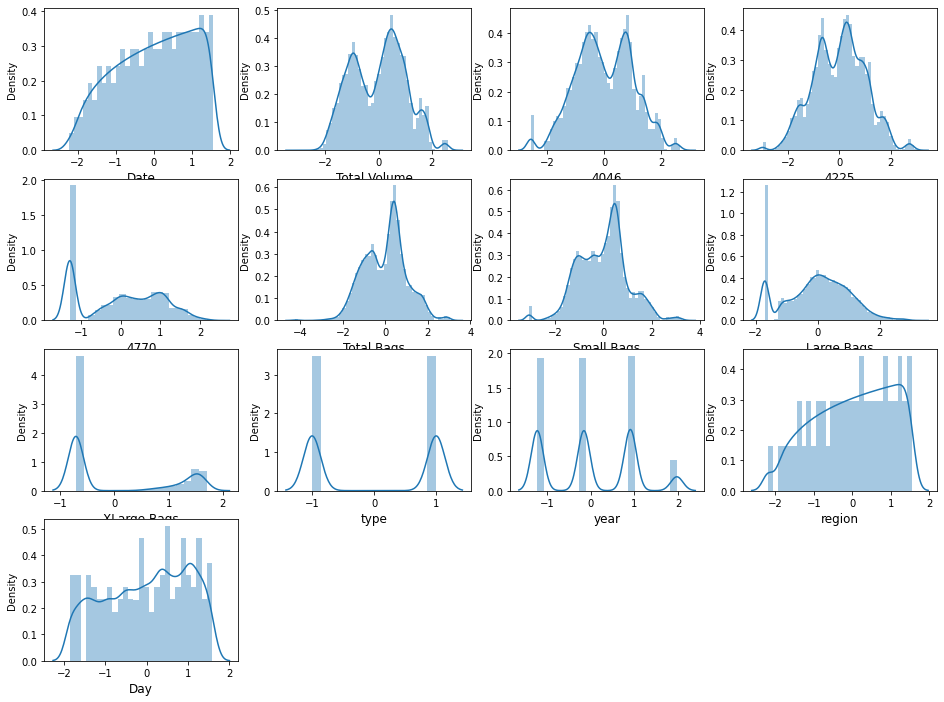

In [30]:
plt.figure(figsize=(16,12))
plotnumber=1

for col in X:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=12)
        
        plotnumber+=1
        plt.tight_layout

# Scatterplot between features and labels

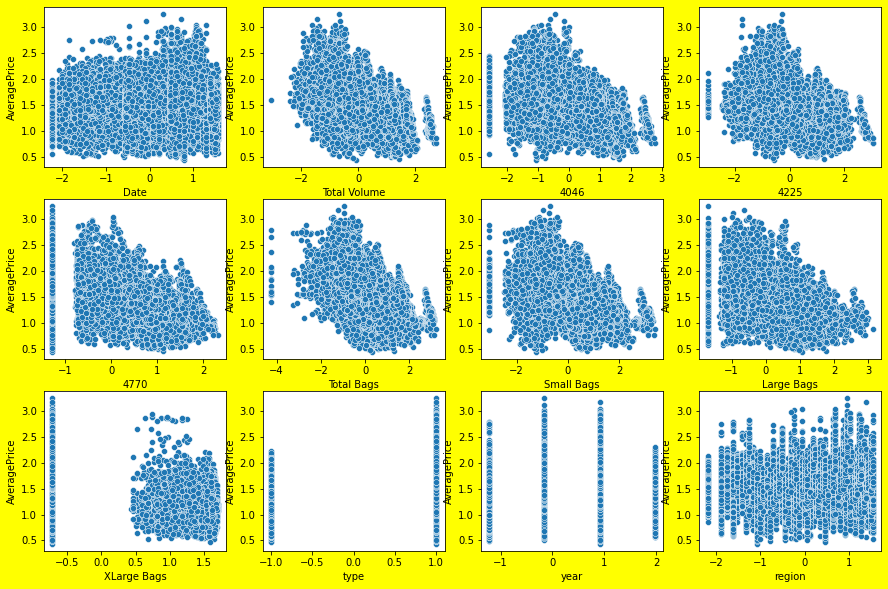

In [31]:
plt.figure(figsize=(15,10),facecolor='Yellow')
plotnumber=1

for column in X:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.scatterplot(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('AveragePrice')
    
        plotnumber+=1
        plt.tight_layout

# Finding Outliers

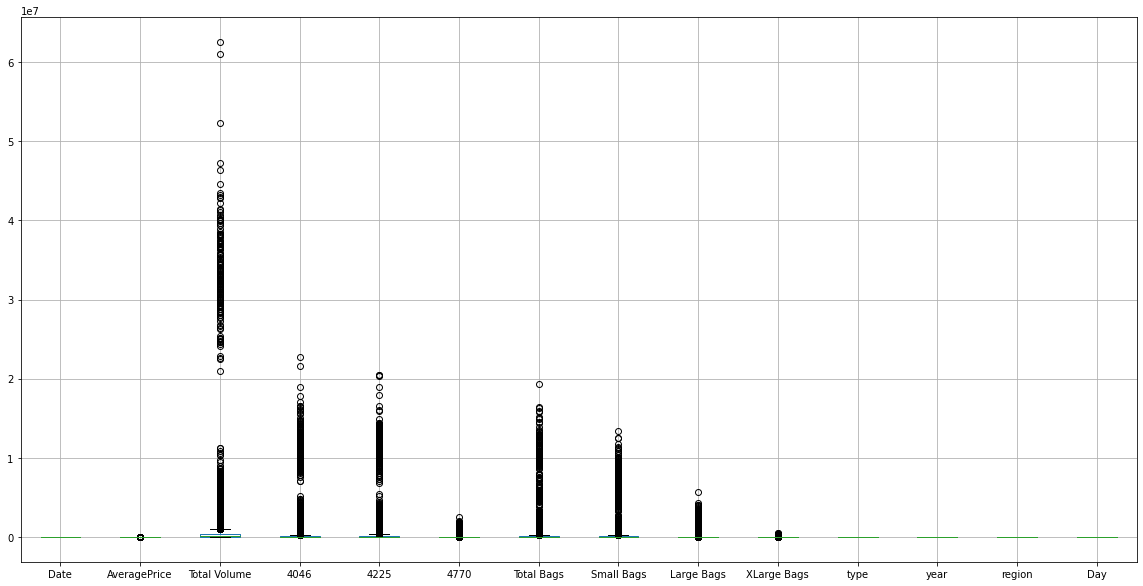

In [32]:
df1.boxplot(figsize=(20,12))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [33]:
(np.abs(zscore(df1))<3).all()

Date             True
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type             True
year             True
region           True
Day              True
dtype: bool

# Removing of Outliers

In [34]:
scores=np.abs(zscore(df1))
t=3
np.where(scores<3)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64),
 array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))

In [35]:
df_out=df1[(scores<3).all(axis=1)]
df_out.shape    

(17651, 14)

In [36]:
df1.shape

(18249, 14)

In [37]:
df_out.reset_index()  #reset index

,index,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day
0,0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,27
1,1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,20
2,2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,13
3,3,22,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,4,46,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,18244,164,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2
17647,18245,159,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,28
17648,18246,158,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,21
17649,18247,157,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,14


# Splitting feautures and labels

In [38]:
X_new=df_out.drop(['AveragePrice'],axis=1)
Y=df_out['AveragePrice']
features=X_new.columns
features

Index(['Date', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Day'],
      dtype='object')

# Scaling Data

In [39]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_scaled=pd.DataFrame(std.fit_transform(X_new))
x_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.665693,-0.392009,-0.349452,-0.278497,-0.322219,-0.429348,-0.400967,-0.379832,-0.259027,-1.019047,-1.210013,-1.695495,1.280854
1,-0.686175,-0.401251,-0.350276,-0.303093,-0.321924,-0.426481,-0.397462,-0.379774,-0.259027,-1.019047,-1.210013,-1.695495,0.502214
2,-0.706657,-0.338702,-0.350002,-0.141449,-0.319832,-0.431303,-0.403413,-0.379696,-0.259027,-1.019047,-1.210013,-1.695495,-0.276425
3,-1.259675,-0.377438,-0.349235,-0.234593,-0.321511,-0.439577,-0.413717,-0.379277,-0.259027,-1.019047,-1.210013,-1.695495,-0.387659
4,-0.768103,-0.405040,-0.349668,-0.305098,-0.321418,-0.438256,-0.412371,-0.378402,-0.259027,-1.019047,-1.210013,-1.695495,1.503322
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,1.648790,-0.438579,-0.347153,-0.411112,-0.323616,-0.412326,-0.381520,-0.375195,-0.259027,0.981309,1.980756,1.747054,-1.500001
17647,1.546380,-0.441726,-0.349099,-0.406345,-0.323616,-0.427335,-0.399501,-0.376661,-0.259027,0.981309,1.980756,1.747054,1.392088
17648,1.525898,-0.441846,-0.349098,-0.408798,-0.302508,-0.426876,-0.397707,-0.380529,-0.259027,0.981309,1.980756,1.747054,0.613449
17649,1.505415,-0.439438,-0.348335,-0.407474,-0.302535,-0.421292,-0.390876,-0.380424,-0.259027,0.981309,1.980756,1.747054,-0.165191


# Applying PCA

In [40]:
from sklearn.decomposition import PCA
pca=PCA(n_components=13)  # Total we have 13 features in the data

data_pca=pca.fit_transform(x_scaled) # Fit the data to PCA
pca_df=pd.DataFrame(data_pca,columns=features)
pca_df

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day
0,-0.860282,1.356002,1.562694,1.217933,-1.007650,-0.695787,0.491399,-0.314299,-0.039652,-0.049122,0.356030,0.000003,6.043903e-09
1,-0.869444,1.355443,1.536803,0.441443,-1.009715,-0.665072,0.536422,-0.311170,-0.046318,-0.075395,0.355926,0.000003,5.825011e-09
2,-0.790258,1.375022,1.520769,-0.340462,-1.009137,-0.652326,0.472330,-0.350831,-0.106871,0.019509,0.356237,0.000004,5.119789e-09
3,-0.857488,1.745761,1.490506,-0.458635,-0.997618,-0.646169,0.598884,-0.333006,-0.111868,-0.040675,-0.033067,0.000004,3.111281e-10
4,-0.884848,1.428020,1.565003,1.438673,-1.006762,-0.701827,0.511139,-0.302706,-0.031252,-0.055691,0.279394,0.000003,5.245912e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,-1.096931,-2.605156,-1.478470,-1.421723,0.528608,0.932661,-0.744778,0.209038,0.166565,0.050396,-0.204680,-0.000006,2.951030e-09
17647,-1.117585,-2.488670,-1.391568,1.461654,0.538447,0.827368,-0.841041,0.220058,0.204625,0.094410,-0.330735,-0.000007,2.360005e-09
17648,-1.111725,-2.483771,-1.408843,0.684114,0.539036,0.863395,-0.818395,0.230848,0.196891,0.078381,-0.330716,-0.000006,2.095770e-09
17649,-1.104250,-2.481802,-1.434254,-0.093063,0.538305,0.890638,-0.788060,0.225457,0.182208,0.065460,-0.330754,-0.000006,1.795289e-09


# Module building 

In [41]:
x_train,x_test,y_train,y_test=train_test_split(pca_df,Y,test_size=0.25,random_state=42)
print(len(x_train),len(x_test),len(y_train),len(y_test))
y_test

13238 4413 13238 4413


3596     1.36
7141     1.70
4625     1.22
5456     0.81
10969    1.85
         ... 
3618     1.05
16950    1.97
11096    1.73
4588     1.30
9061     0.90
Name: AveragePrice, Length: 4413, dtype: float64

# Finding Best parameter tunings for the regressor algorithm

# Lasso

In [42]:
alpha_value={'alpha':[1,.1,.01,.001,.0001,0]}
model_test=Lasso()
grid=GridSearchCV(estimator=model_test,param_grid=alpha_value)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
0.42727717263360343
0.0001
{'alpha': 0.0001}


# Ridge model

In [43]:
alpha_value1={'alpha':[1,.1,.01,.001,.0001,0]}
model_test1=Ridge()
grid=GridSearchCV(estimator=model_test1,param_grid=alpha_value)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
0.42727779055871873
1
{'alpha': 1}


# Decision Tree Regressor

In [44]:
Min_Samples={'min_samples_leaf':[100,150,1000,1]}
model_test2=DecisionTreeRegressor()
grid=GridSearchCV(estimator=model_test2,param_grid=Min_Samples)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.min_samples_leaf)
print(grid.best_params_)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'min_samples_leaf': [100, 150, 1000, 1]})
0.5296347693876653
100
{'min_samples_leaf': 100}


# Predicting output using models

In [47]:
model=[Lasso(alpha=0,max_iter=50),Ridge(alpha=0),LinearRegression(),DecisionTreeRegressor(max_depth=15,min_samples_leaf=1),RandomForestRegressor(n_estimators=500,max_depth=6,min_samples_leaf=20,n_jobs=3)]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Model Score = \n',m,'is :')
    print("EV score",explained_variance_score(y_test,predm))
    print("R2_score",r2_score(y_test,predm))
    print("MTD",mean_tweedie_deviance(y_test,predm))
    print("-------------------------------------------")

Model Score = 
 Lasso(alpha=0, max_iter=50) is :
EV score 0.4133225965205267
R2_score 0.412815838978147
MTD 0.08818359679242957
-------------------------------------------
Model Score = 
 Ridge(alpha=0) is :
EV score 0.4133225965205267
R2_score 0.412815838978147
MTD 0.08818359679242957
-------------------------------------------
Model Score = 
 LinearRegression() is :
EV score 0.4133225965205267
R2_score 0.412815838978147
MTD 0.08818359679242957
-------------------------------------------
Model Score = 
 DecisionTreeRegressor(max_depth=15) is :
EV score 0.5384018305220504
R2_score 0.5383342736437797
MTD 0.06933317852959918
-------------------------------------------
Model Score = 
 RandomForestRegressor(max_depth=6, min_samples_leaf=20, n_estimators=500,
                      n_jobs=3) is :
EV score 0.559026348211251
R2_score 0.5586727706781998
MTD 0.06627873336417421
-------------------------------------------


*  In the above data RandomForestRegressor giving a best accurate values.

# Saving model

In [62]:
import joblib
joblib.dump(RandomForestRegressor(max_depth=6, min_samples_leaf=20, n_estimators=500,n_jobs=3),'Avocado_price.pkl')

['Avocado_price.pkl']

# Classification model

In [49]:
x_clf=df_out.drop(['region','Date'],axis=1)
y_clf=df_out['region']
x_clf

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,29
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,14


# Importng required libraries

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Scaling Data

In [51]:
sc=StandardScaler()
sc.fit_transform(x_clf)
x_clf=pd.DataFrame(x_clf,columns=x_clf.columns)
x_clf

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,29
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,14


# Buliding model

# Finding Best Random State

In [52]:
models=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier()]

max_acc=0
for r_state in range(30,80):
    xc_train,xc_test,yc_train,yc_test=train_test_split(x_clf,y_clf,test_size=0.25,random_state=r_state)
    for model in models:
        model.fit(xc_train,yc_train)
        pred_c=model.predict(xc_test)
        acc_score=accuracy_score(yc_test,pred_c)
        print("Accuracy score is :",acc_score,"At Random State : ",r_state)
        if acc_score>max_acc:
            max_acc=acc_score
            final_state=r_state
            
print("Best Random state ",final_state,"Best accuracy score ",max_acc)       

Accuracy score is : 0.7933378653976887 At Random State :  30
Accuracy score is : 0.24994334919555858 At Random State :  30
Accuracy score is : 0.6464989802855201 At Random State :  30
Accuracy score is : 0.9002945841830954 At Random State :  30
Accuracy score is : 0.7808746884205756 At Random State :  31
Accuracy score is : 0.26308633582596874 At Random State :  31
Accuracy score is : 0.648765012463177 At Random State :  31
Accuracy score is : 0.9023340131429867 At Random State :  31
Accuracy score is : 0.7772490369363245 At Random State :  32
Accuracy score is : 0.24722411058237026 At Random State :  32
Accuracy score is : 0.6496714253342397 At Random State :  32
Accuracy score is : 0.9061862678450034 At Random State :  32
Accuracy score is : 0.799002945841831 At Random State :  33
Accuracy score is : 0.2519827781554498 At Random State :  33
Accuracy score is : 0.6675730795377295 At Random State :  33
Accuracy score is : 0.9068660774983005 At Random State :  33
Accuracy score is : 0.7

In [53]:
print("Best Random state ",final_state,"Best accuracy score ",max_acc)       

Best Random state  66 Best accuracy score  0.9104917289825516


# Modeling using Models

In [54]:
from sklearn.metrics import confusion_matrix,classification_report
x_train,x_test,y_train,y_test=train_test_split(x_clf,y_clf,test_size=0.30,random_state=66)
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
for model in models:
    model.fit(xc_train,yc_train)
    predlr=model.predict(xc_test)
    print("Model Name",model)
    print("Accuracy",accuracy_score(yc_test,predlr)*100)
    print(confusion_matrix(yc_test,predlr))
    print(classification_report(yc_test,predlr))
    print('------------------------------------')

Model Name LogisticRegression()
Accuracy 17.176523906639474
[[ 0  0  1 ...  0  0  0]
 [ 0  6  0 ...  4  1  2]
 [ 0  0 47 ...  0  0  0]
 ...
 [ 0  0  0 ... 27  9  0]
 [ 0  0  0 ... 12 28  0]
 [ 1  0  1 ...  4  8  3]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.11      0.10      0.10        63
           2       0.42      0.45      0.43       105
           3       0.00      0.00      0.00        80
           4       0.27      0.15      0.19        86
           5       0.14      0.26      0.18        92
           6       0.11      0.25      0.15        64
           7       0.10      0.01      0.02        79
           8       0.82      0.48      0.61        83
           9       0.13      0.52      0.21        84
          10       0.00      0.00      0.00        80
          11       0.02      0.01      0.02        84
          12       0.24      0.50      0.32        90
          13       0.55    

*  Hence RandomForestClassifier has a best accuracy score of 90%,so this model is best fit.

# Cross Validation score

In [58]:
from sklearn.model_selection import cross_val_score
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
for model in models:
    scr=cross_val_score(model,x_clf,y_clf,cv=5)
    print("Model Name :",model)
    print("Cross validation score is: ", scr.mean()*100)
    print('---------------------------------------')

Model Name : LogisticRegression()
Cross validation score is:  13.647629293918776
---------------------------------------
Model Name : KNeighborsClassifier()
Cross validation score is:  43.294876701140765
---------------------------------------
Model Name : DecisionTreeClassifier()
Cross validation score is:  55.181480420685105
---------------------------------------
Model Name : RandomForestClassifier()
Cross validation score is:  67.48088280009597
---------------------------------------


*  Hence for region prdiction the RandomForestClassifier model is best giving accuracy score of 90%,cross validation score is 67%

# Save Model

In [61]:
joblib.dump(RandomForestRegressor,'Avocado_region.pkl')

['Avocado_region.pkl']